# 📘 Stock Market Analysis Project (INFY.NS)

# ✅ Import Librari
# ✅ Why use yfinance?
 '''yfinance is commonly used for:

Downloading historical stock data.

Fetching real-time price quotes.

Getting financial statements, dividends, and splits.

Analyzing market trends using Python.
'''

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Download Stock Data

# ticker = 'INFY.NS'
What it does:
Stores the stock ticker symbol of Infosys Ltd. traded on the NSE (National Stock Exchange of India).

Explanation:

'INFY' = Symbol for Infosys.

'.NS' = Tells yfinance to fetch data from the Indian exchange (NSE).

If you were fetching from the US exchange, e.g., Apple, you'd use 'AAPL' instead (no .NS).

# df = yf.download(ticker, start="2023-01-01", end="2024-01-01")
What it does:
Uses the yfinance library (aliased as yf) to download historical stock data for Infosys from Jan 1, 2023 to Jan 1, 2024.

Detailed parameters:

 ticker: The stock symbol ('INFY.NS').

start="2023-01-01": Start date for the data.

end="2024-01-01": End date (note: non-inclusive – it fetches data up to Dec 31, 2023).

In [2]:
ticker = 'INFY.NS'
df = yf.download(ticker, start="2023-01-01", end="2024-01-01")

/tmp/ipython-input-2-4031679846.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


# ✅ Display First Few Rows

In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2023-01-02,1447.492554,1449.867049,1428.544125,1437.994571,3801140
2023-01-03,1446.115234,1455.708173,1439.039169,1443.550710,4551130
2023-01-04,1419.758423,1444.643090,1416.244100,1444.643090,7059590
2023-01-05,1401.142334,1430.301210,1395.491081,1430.301210,9868404
2023-01-06,1375.782837,1400.952492,1373.883240,1396.203500,6443714


# ✅ Calculate Daily Return

It calculates the daily percentage change in the closing price of the stock and creates a new column in the DataFrame called 'Daily_Return'.

🔢 Let's Break It Down:
1. df['Close']
This selects the 'Close' column from the DataFrame.

It contains the daily closing prices of the stock.

2. .pct_change()
This is a Pandas method that computes the percentage change between the current day and the previous day.

Formula behind the scenes:

Daily Return
=
Current Day’s Close
−
Previous Day’s Close
Previous Day’s Close
Daily Return=
Previous Day’s Close
Current Day’s Close−Previous Day’s Close
​

3. df['Daily_Return'] = ...
This creates a new column in the DataFrame named 'Daily_Return' and stores the result of the percentage change calculation.



In [4]:
df['Daily_Return'] = df['Close'].pct_change()

# ✅ Calculate Rolling Metrics
# 1. Rolling Mean (SMA)

SMA (Simple Moving Average) is the average price of a stock over a specific number of past days, calculated in a rolling window.

It is used to:

Smooth out short-term fluctuations

Identify trends (uptrend, downtrend)

Generate buy/sell signals

📐 SMA Formula:
𝑆
𝑀
𝐴
=
𝑃
1
+
𝑃
2
+
⋯
+
𝑃
𝑛
𝑛
SMA=
n
P
1
​
 +P
2
​
 +⋯+P
n
​

​

Where:

𝑃
P = Price at each day (usually the Closing Price)

𝑛
n = Number of days (e.g., 5, 20, 50, 200)

🧠 Example:
Let’s say you want a 5-day SMA for these closing prices:

Day	Close
1-100
2-102
3-101
4-105
5-107

Then:

SMA
5
=(
100
+
102
+
101
+
105
+
107)

=
515.0


SMA
5
​=(515.0)/5
 =103.0


# df['SMA_20'] = df['Close'].rolling(window=20).mean()
# df['SMA_50'] = df['Close'].rolling(window=50).mean()
These lines calculate two Simple Moving Averages (SMA) for the stock's closing price using different time windows: 20 days and 50 days.

🔹 1. df['Close']
Refers to the closing price column in your DataFrame df.

It's the daily price at which the stock closed trading.

🔹 2. .rolling(window=20) and .rolling(window=50)
Applies a rolling window of 20 or 50 days to the data.

For each day, it looks back at the previous 20 or 50 days of closing prices.

It creates a temporary window for averaging.

🔹 3. .mean()
Calculates the mean (average) of values in each rolling window.

So for each row in the DataFrame, it computes the average of the previous 20 or 50 closing prices.

🔹 4. df['SMA_20'] = ... and df['SMA_50'] = ...
Creates two new columns:

'SMA_20': The 20-day simple moving average.

'SMA_50': The 50-day simple moving average.

🧠 Purpose of These SMAs:
SMA_20: Short-term trend (reacts faster to price changes).

SMA_50: Medium-term trend (smoother, less reactive).

These are often used in combination for:

Trend Analysis

Crossover Signals:

Bullish crossover: When SMA_20 crosses above SMA_50 → Buy signal.

Bearish crossover: When SMA_20 crosses below SMA_50 → Sell signal.



In [5]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# 2. Exponential Moving Average (EMA)

# 📘 What is EMA (Exponential Moving Average)?
EMA (Exponential Moving Average) is a type of moving average that gives more weight to recent prices, making it more sensitive to recent price changes compared to SMA (Simple Moving Average).

🔍 Key Differences: EMA vs SMA
(Feature) 	{SMA}      {EMA}
(Weighting)-	[Equal weight to all days],	[More weight to recent days]
(Reacts to price)-	[Slower], [Faster]
(Used for)-	[Trend smoothing],	[Trend + momentum detection]

📐 EMA Formula (conceptual):
EMA
today
=
(
Price
today
×
𝛼
)
+
(
EMA
yesterday
×
(
1
−
𝛼
)
)
EMA
today
​
 =(Price
today
​
 ×α)+(EMA
yesterday
​
 ×(1−α))


Where:

𝛼
=
2
𝑛
+
1
α=
n+1
2
​
  → smoothing factor

𝑛
n = Number of periods (e.g., 20 for a 20-day EMA)



# about this code
This line calculates the 20-day Exponential Moving Average (EMA) of the closing prices in your stock DataFrame df, and stores the result in a new column called 'EMA_20'.

🔍 Line-by-Line Explanation:
✅ df['Close']
Refers to the closing price column in your DataFrame.

It’s the price of the stock at the end of each trading day.

✅ .ewm(span=20, adjust=False)
This applies exponential weighting to the closing prices.

Details:

ewm() → Stands for Exponentially Weighted Moving average.

span=20 → The number of periods (days) over which EMA is calculated.

EMA gives more weight to recent prices, and the "span" controls how quickly the weights decrease.

adjust=False → More common setting for financial data.

It calculates the EMA in a recursive way, giving more accurate results for price time series.

✅ .mean()
This calculates the exponentially weighted average (i.e., the EMA) over the specified span (20 days in this case).

✅ df['EMA_20'] = ...
This creates a new column in your DataFrame named 'EMA_20'.

Each row will contain the 20-day EMA value for that day.



In [6]:
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# 3. Volatility (Rolling Std Dev of Returns)

📌 Purpose:
This line calculates the 20-day rolling volatility (standard deviation) of the stock's daily returns, and stores the result in a new column called 'Volatility'.

🔍 Line-by-Line Explanation:
✅ df['Daily_Return']
Refers to the column that holds daily percentage returns of the stock.

You likely created it earlier using:

python
Copy code
df['Daily_Return'] = df['Close'].pct_change()
✅ .rolling(window=20)
This creates a rolling window of 20 days over the 'Daily_Return' column.

For each day, it looks at the previous 20 values (returns) to perform the next operation.

✅ .std()
Computes the standard deviation of the daily returns within that 20-day window.

Standard deviation measures how much the daily returns are deviating from the average return — this is what we call volatility in finance.

✅ df['Volatility'] = ...
Creates a new column in the DataFrame named 'Volatility'.

Each row contains the 20-day volatility (standard deviation of daily returns) for that date.

📐 Formula Behind the Scenes:
Volatility
20
=
1
𝑛
−
1
∑
𝑖
=
1
𝑛
(
𝑅
𝑖
−
𝑅
ˉ
)
2
Volatility
20
​
 =
n−1
1
​
  
i=1
∑
n
​
 (R
i
​
 −
R
ˉ
 )
2

​

Where:

𝑅
𝑖
  = Daily return on day i

𝑅
ˉ


  = Mean of daily returns over the last 20 days

𝑛
=
20
n=20



🧠 Why is Volatility Important?
Measures risk or uncertainty in price movements.

High volatility = large, unpredictable swings.

Low volatility = more stable price behavior.

Used in:

Risk management

Options pricing

Technical trading strategies

In [8]:
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

In [19]:
print(df['Volatility'])

Date
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
                ...   
2023-12-22    0.017033
2023-12-26    0.017203
2023-12-27    0.017387
2023-12-28    0.017364
2023-12-29    0.017685
Name: Volatility, Length: 245, dtype: float64


# ✅ Plot Close Price and Moving Averages

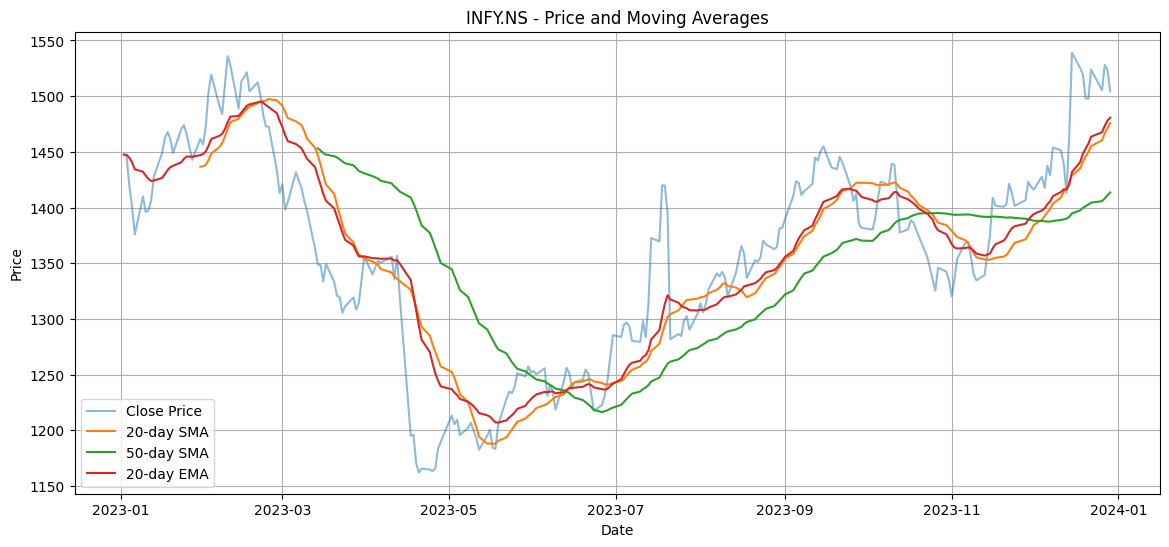

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.plot(df['EMA_20'], label='20-day EMA')
plt.title(f"{ticker} - Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Plot Volatility

Text(0, 0.5, 'Volatility')

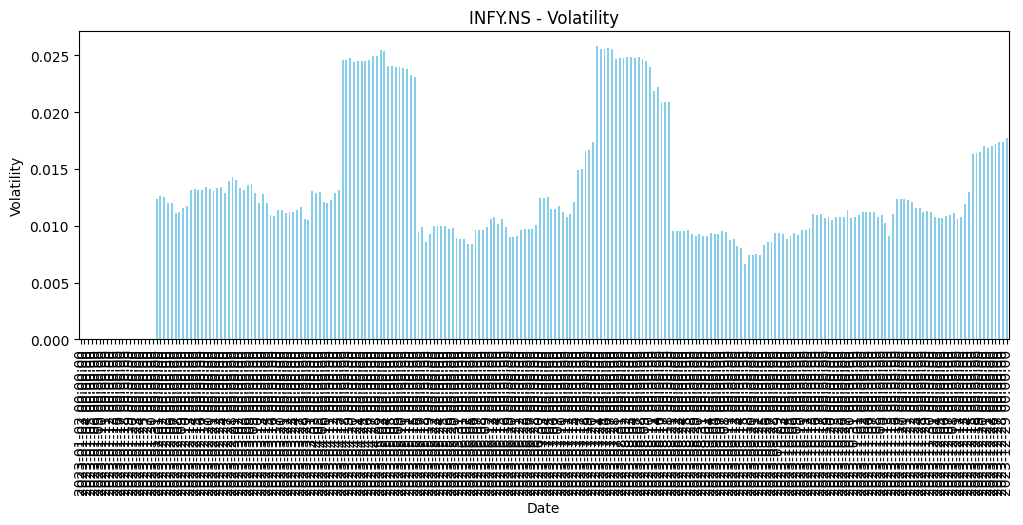

In [18]:
plt.figure(figsize=(12, 4))
df['Volatility'].plot(kind='bar', color='skyblue')
plt.title(f"{ticker} - Volatility")
#plt.xlabel("Date")
plt.ylabel("Volatility")

# ✅ Calculate and Print Annualized Volatility

In [12]:
daily_volatility = df['Daily_Return'].std()
annualized_volatility = daily_volatility * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")

Annualized Volatility: 23.33%


# ✅ Plot Daily and Cumulative Return

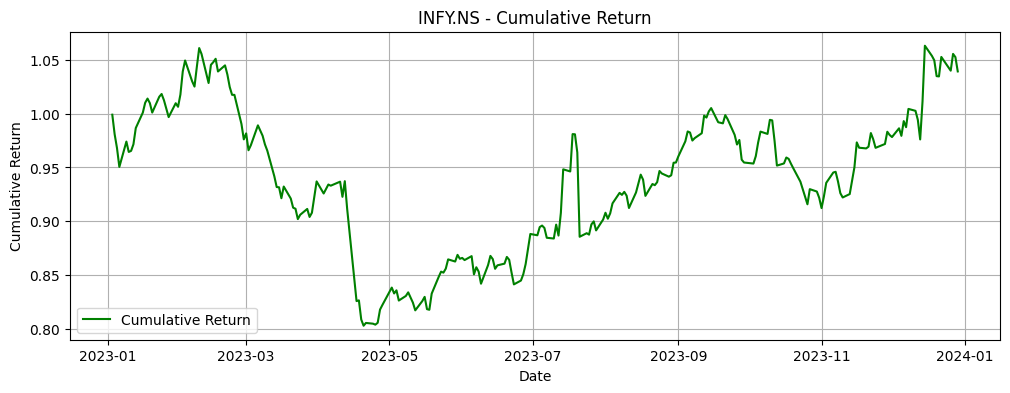

In [13]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
plt.figure(figsize=(12, 4))
plt.plot(df['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title(f"{ticker} - Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Create a function and put all activities into this function, so that, when we will give a new data set  , it will give same reasults for each and every data sets.

/tmp/ipython-input-17-3656241574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


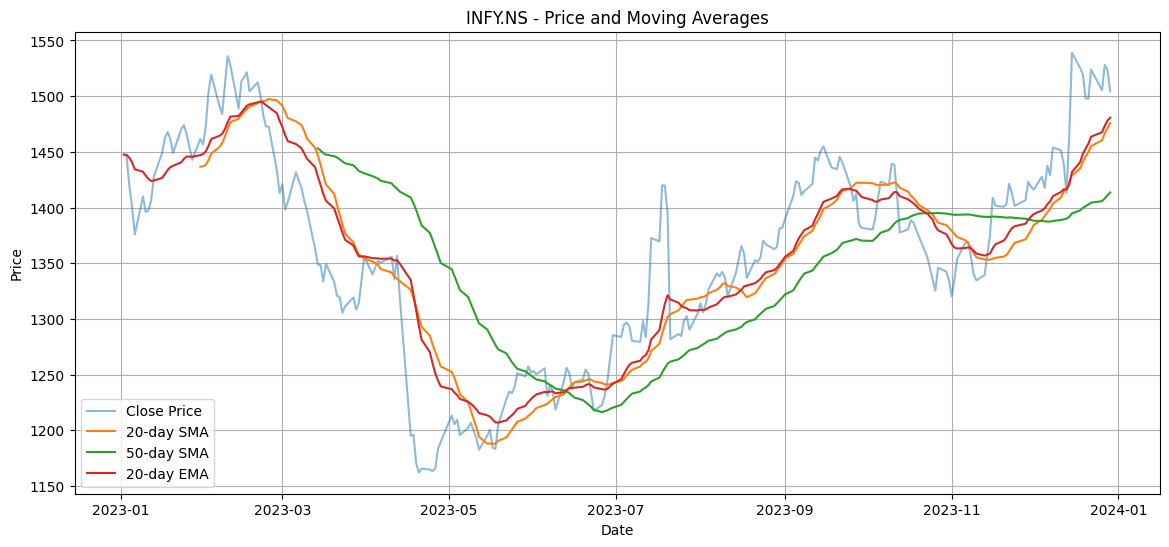

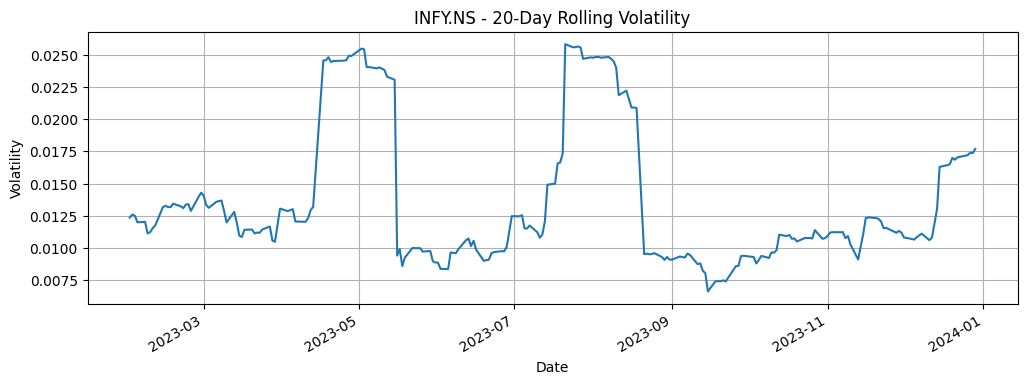

Annualized Volatility for INFY.NS: 23.33%


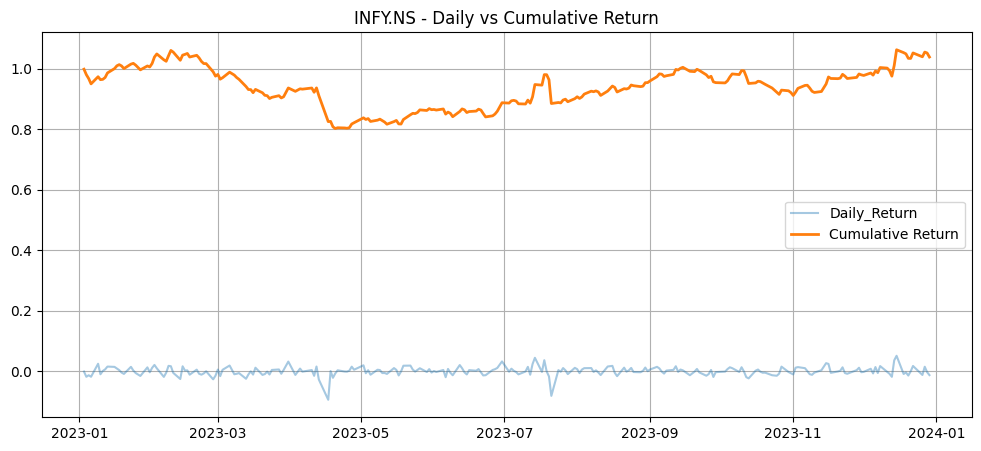

In [17]:
def analyze_stock(ticker: str, start_date="2023-01-01", end_date="2024-01-01"):
    # ✅ Download Stock Data
    df = yf.download(ticker, start=start_date, end=end_date)

    # ✅ Calculate Daily Return
    df['Daily_Return'] = df['Close'].pct_change()

    # ✅ Calculate Rolling Metrics
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['Volatility_20'] = df['Daily_Return'].rolling(window=20).std()

    # ✅ Plot Close Price and Moving Averages
    plt.figure(figsize=(14, 6))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df['SMA_20'], label='20-day SMA')
    plt.plot(df['SMA_50'], label='50-day SMA')
    plt.plot(df['EMA_20'], label='20-day EMA')
    plt.title(f"{ticker} - Price and Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Plot Volatility
    plt.figure(figsize=(12, 4))
    df['Volatility_20'].plot(title=f"{ticker} - 20-Day Rolling Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.grid(True)
    plt.show()

    # ✅ Calculate and Print Annualized Volatility
    daily_vol = df['Daily_Return'].std()
    annualized_vol = daily_vol * np.sqrt(252)
    print(f"Annualized Volatility for {ticker}: {annualized_vol:.2%}")

    # ✅ Plot Daily and Cumulative Return
    df['Cumulative Return'] = (1 + df['Daily_Return']).cumprod()
    plt.figure(figsize=(12, 5))
    plt.plot(df['Daily_Return'], label='Daily_Return', alpha=0.4)
    plt.plot(df['Cumulative Return'], label='Cumulative Return', linewidth=2)
    plt.title(f"{ticker} - Daily vs Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Return final DataFrame (optional)
    return df

# 📌 Example Usage:
df_result = analyze_stock("INFY.NS")
# df_result = analyze_stock("TCS.NS", start_date="2022-01-01", end_date="2023-01-01")

# 📌 End of Notebook
